##### Candidate Name: Putra Bahy Helmi Hartoyo
##### Candidate Email: bahyhelmi97@gmail.com

- This notebook is written to fulfill the assesment task of PozaLabs in creating music samples from MusicVAE architecture using MIDI dataset.
- This notebook adopt the method available on the official GitHub repository of MusicVAE: https://github.com/magenta/magenta/tree/main/magenta/models/music_vae#training-your-own-musicvae

#### Import Libraries

In [9]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds

In [10]:
# Check for GPUs
gpus = tf.config.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

#### Explore Data
- We will do simple checking and sanity check on the dataset.
- We directly use the readily available MIDI dataset provided by Tensorflow Datasets.

In [3]:
# Known styles
STYLES = ['afrobeat', 'afrocuban', 'blues', 'country', 'dance', 'funk', 'gospel', 'highlife', 'hiphop', 'jazz', 'latin', 'middleeastern', 'neworleans', 'pop', 'punk', 'reggae', 'rock', 'soul']

In [ ]:
# Load the MIDI dataset (4-bar only) as a tf.data.Dataset
df_groove = tfds.as_dataframe(tfds.load(
    name="groove/4bar-midionly",
    split=tfds.Split.TRAIN,
    try_gcs=True))

In [5]:
# Sanity check on data
feature_list = df_groove.columns
print(feature_list)
df_groove.head()

Index(['bpm', 'drummer', 'id', 'midi', 'style/primary', 'style/secondary',
       'time_signature', 'type'],
      dtype='object')


,bpm,drummer,id,midi,style/primary,style/secondary,time_signature,type
0,290,0,b'drummer1/session1/78:000:001:002:003:004:005...,b'MThd\x00\x00\x00\x06\x00\x01\x00\x02\x01\xe0...,9,b'fast',1,0
1,95,7,b'drummer8/session1/2:000:001',b'MThd\x00\x00\x00\x06\x00\x01\x00\x02\x01\xe0...,5,b'',1,0
2,115,7,b'drummer8/session1/22:000:001:002:003:004:005...,b'MThd\x00\x00\x00\x06\x00\x01\x00\x02\x01\xe0...,5,b'',1,0
3,128,0,b'drummer1/session3/5:000:001:002:003:004:005:...,b'MThd\x00\x00\x00\x06\x00\x01\x00\x02\x01\xe0...,9,b'linear',1,0
4,125,0,b'drummer1/session1/51:000:001:002:003',b'MThd\x00\x00\x00\x06\x00\x01\x00\x02\x01\xe0...,16,b'shuffle',1,0


- We have 8 columns, that stores the information about each of the MIDI files in the train set.

In [6]:
# Map style to known styles
df_groove['style/primary'] = df_groove['style/primary'].apply(lambda x: STYLES[x])
df_groove.head()

,bpm,drummer,id,midi,style/primary,style/secondary,time_signature,type
0,290,0,b'drummer1/session1/78:000:001:002:003:004:005...,b'MThd\x00\x00\x00\x06\x00\x01\x00\x02\x01\xe0...,jazz,b'fast',1,0
1,95,7,b'drummer8/session1/2:000:001',b'MThd\x00\x00\x00\x06\x00\x01\x00\x02\x01\xe0...,funk,b'',1,0
2,115,7,b'drummer8/session1/22:000:001:002:003:004:005...,b'MThd\x00\x00\x00\x06\x00\x01\x00\x02\x01\xe0...,funk,b'',1,0
3,128,0,b'drummer1/session3/5:000:001:002:003:004:005:...,b'MThd\x00\x00\x00\x06\x00\x01\x00\x02\x01\xe0...,jazz,b'linear',1,0
4,125,0,b'drummer1/session1/51:000:001:002:003',b'MThd\x00\x00\x00\x06\x00\x01\x00\x02\x01\xe0...,rock,b'shuffle',1,0


- Primary styles were stored with integer-based index, we can convert it back to string for the sake of readibility.

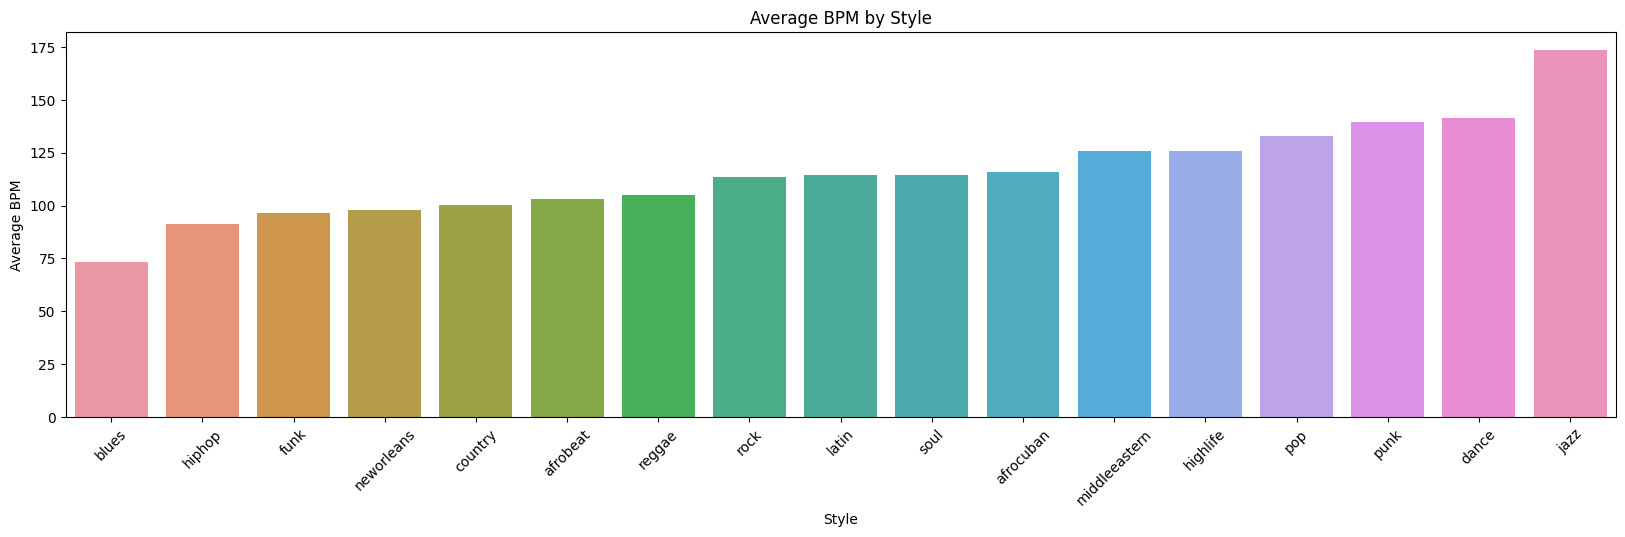

In [7]:
# Analyze beats per minutes
avg_bpm = df_groove.groupby("style/primary")['bpm'].mean().sort_values()

# Create a bar plot using Seaborn
plt.figure(figsize=(20,5))
sns.barplot(x=avg_bpm.index, y=avg_bpm.values)

# Customize the plot
plt.xlabel('Style')
plt.ylabel('Average BPM')
plt.title('Average BPM by Style')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

- We can observed that average BPM is highest within Jazz musics and the slowest in Blues music.

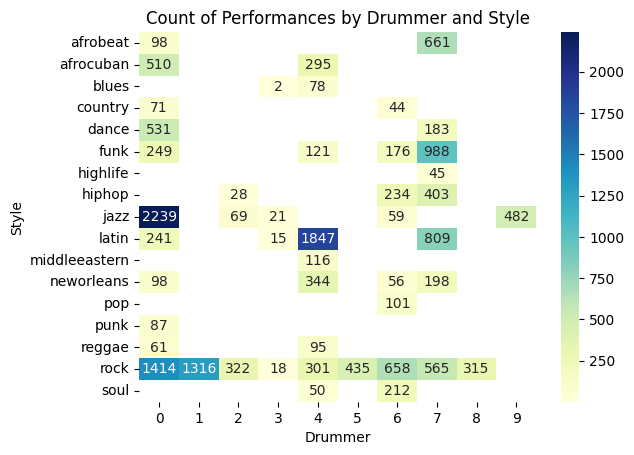

In [8]:
# Group the drummer by its style
grouped_drummer = df_groove.groupby(['drummer','style/primary']).size()

# Convert the series to a DataFrame
df = grouped_drummer.reset_index(name='count')

# Create a pivot table to rearrange the data for the heatmap
pivot_table = df.pivot(index='style/primary', columns='drummer', values='count')

# Create a heatmap using Seaborn
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f')

# Customize the plot
plt.xlabel('Drummer')
plt.ylabel('Style')
plt.title('Count of Performances by Drummer and Style')

# Show the plot
plt.show()

- We can observed that Drummer 1, Drummer 5, and Drummer 8 only plays on Rock genre, while Drummer 9 only plays Jazz. 
- Drummer 0 contributes to the most number of samples and genre played.
- Drummer 3 has the least amount of performance in the dataset.